In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3 import DQN

In [3]:
model = DQN.load('../best_model/dqn/MlpPolicy/best_model.zip')
# model = DQN.load('../output_models/dqn/MlpPolicy/2022-06-06_21_48_53_32.zip')
dqn_net = model.q_net
# model.load_replay_buffer("../best_model/dqn/MlpPolicy/best_model_rb")
# X = model.replay_buffer.observations
# X = torch.Tensor(X)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/stable_baselines3/dqn/dqn.py:153: UserWarning: The number of environments used is greater than the target network update interval (4 > 1), therefore the target network will be updated after each call to env.step() which corresponds to 4 steps.
  "The number of environments used is greater than the target network "


In [4]:
X = np.load('../best_model/dqn/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([6633, 1, 7])

In [5]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

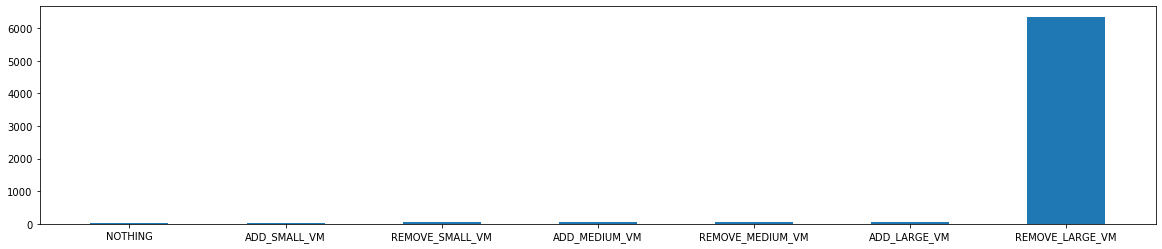

In [6]:
plot_action_histogram(predictions)

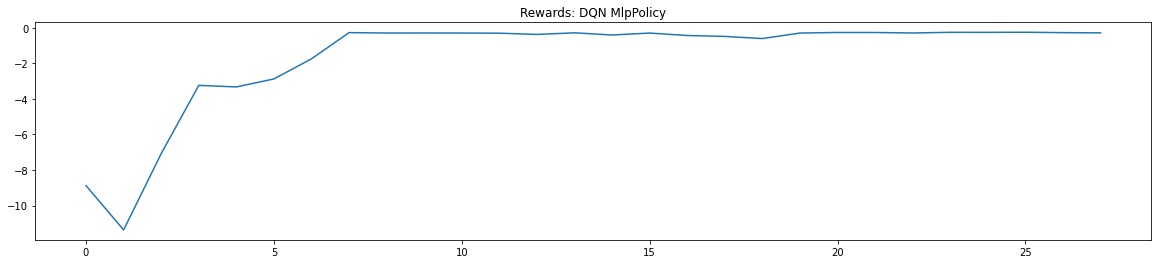

In [7]:
plot_training_data('../best_model/dqn/MlpPolicy/best_model_rewards.csv', data_type='reward', title='DQN MlpPolicy')

In [8]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
X_sample = X[N+40:2*(N+40)]
predictions_sample = predictions[N+40:2*(N+40)]
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_sample,
                            predictions=predictions_sample)
mean_attributions = ig_attributor.get_mean_attributions()


torch.Size([540, 1, 7])


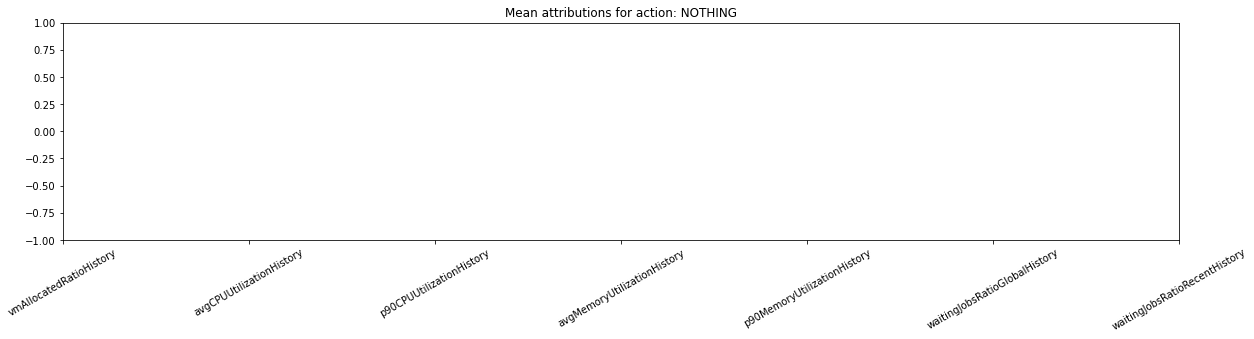

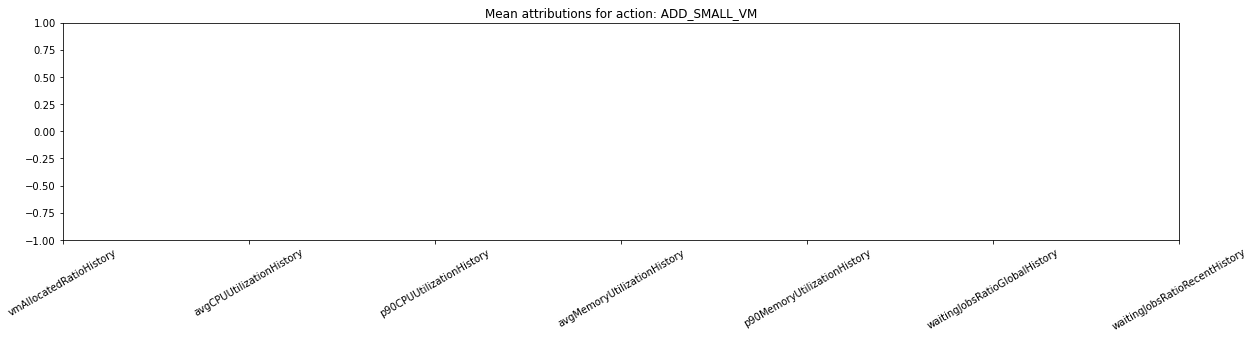

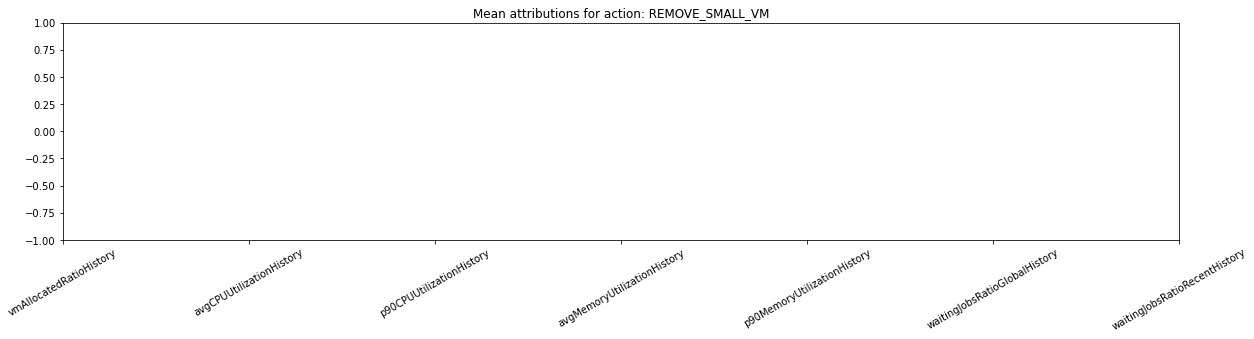

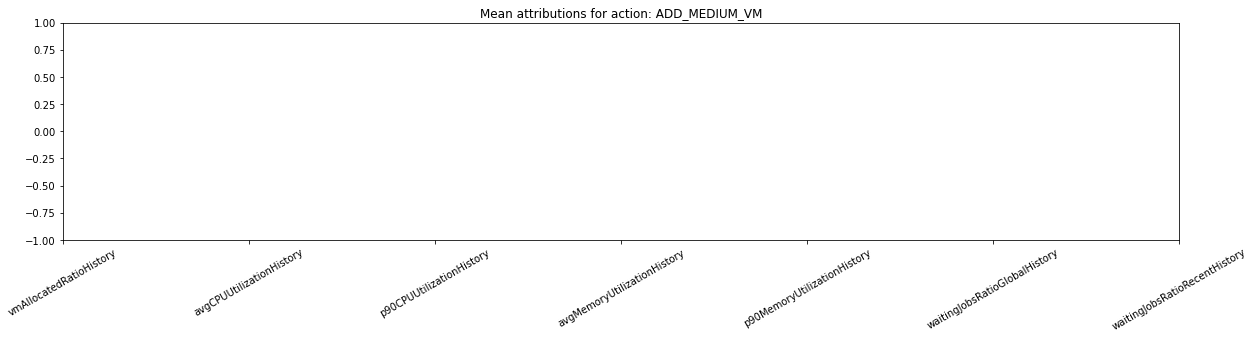

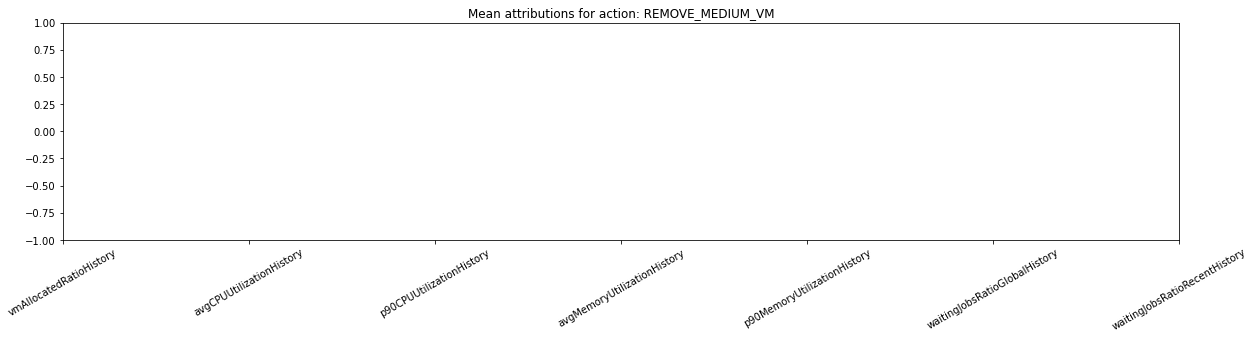

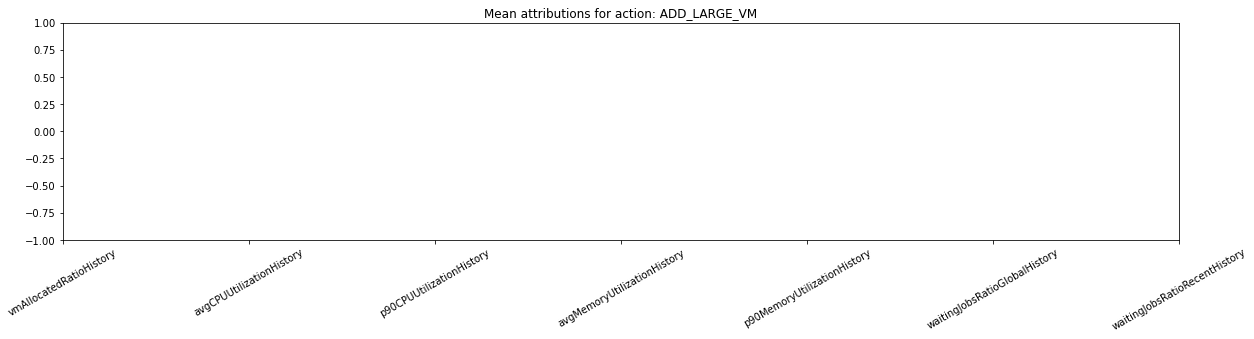

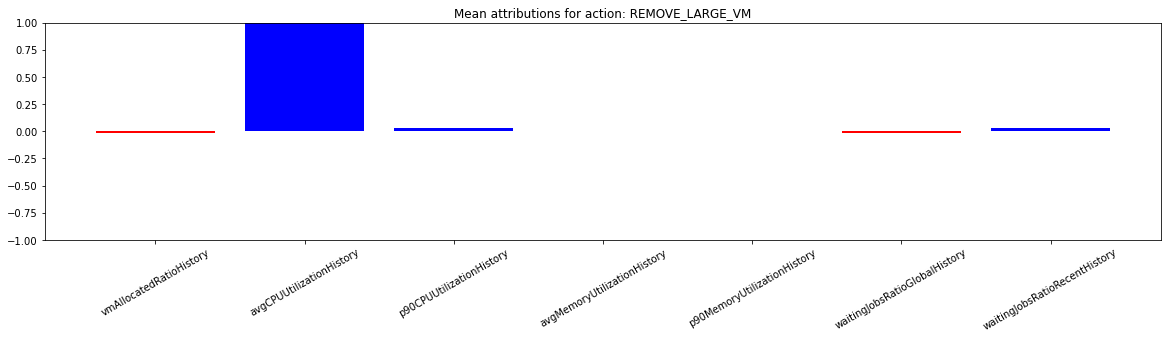

In [9]:
plot_mean_attributions(mean_attributions=mean_attributions)

Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: 0.05765831470489502
ADD_SMALL_VM: 0.006227627396583557
REMOVE_SMALL_VM: 0.0380452424287796
ADD_MEDIUM_VM: -0.018430553376674652
REMOVE_MEDIUM_VM: 0.05463387817144394
ADD_LARGE_VM: -0.017544548958539963
REMOVE_LARGE_VM: 0.09623628109693527


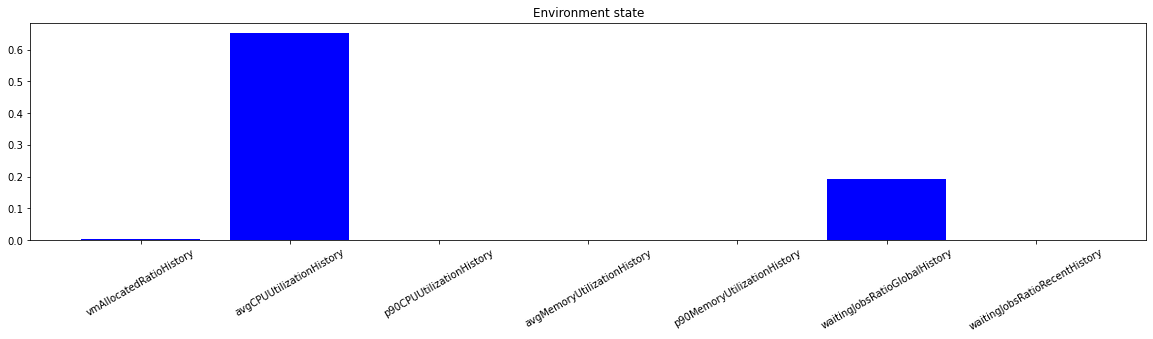

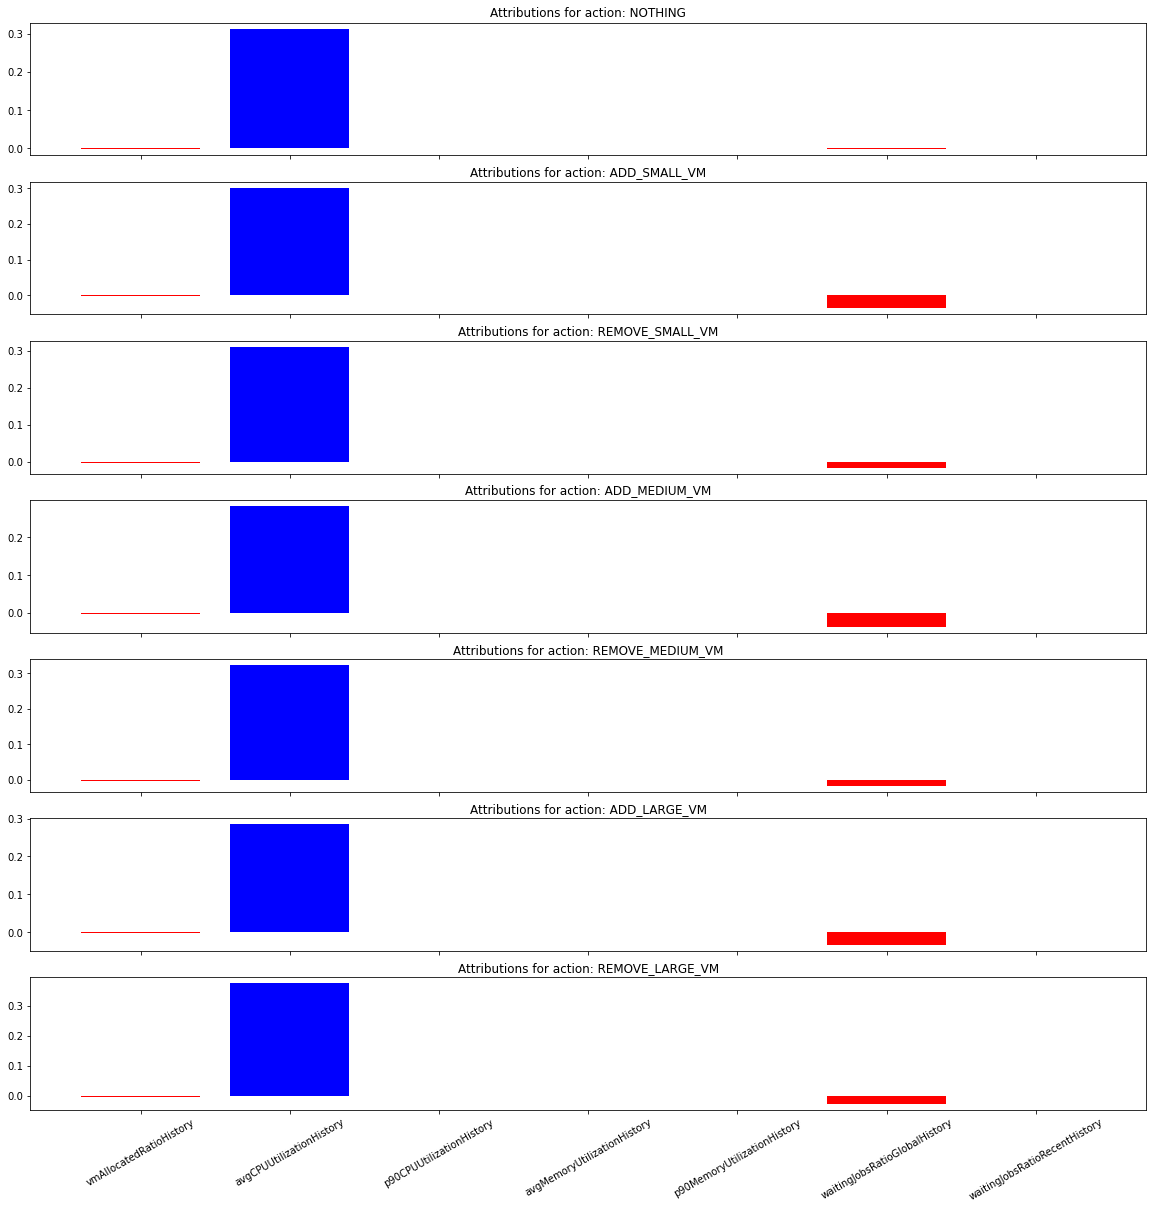

In [10]:
ig_attributor.explain_example(idx=450)

In [11]:
action_observation_map = get_action_observation_map(predictions)

{'ADD_LARGE_VM': 62,
 'ADD_MEDIUM_VM': 44,
 'ADD_SMALL_VM': 42,
 'NOTHING': 38,
 'REMOVE_LARGE_VM': 6351,
 'REMOVE_MEDIUM_VM': 53,
 'REMOVE_SMALL_VM': 43}


In [13]:
idx = action_observation_map['ADD_MEDIUM_VM'].squeeze(1)[:500]

In [14]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='mlp',
                            agent='dqn',
                            data=X[idx],
                            predictions=predictions[idx])

torch.Size([44, 1, 7])


Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: -0.18995797634124756
ADD_SMALL_VM: -0.20231561362743378
REMOVE_SMALL_VM: -0.19521407783031464
ADD_MEDIUM_VM: -0.21249228715896606
REMOVE_MEDIUM_VM: -0.19086764752864838
ADD_LARGE_VM: -0.21754899621009827
REMOVE_LARGE_VM: -0.17848779261112213


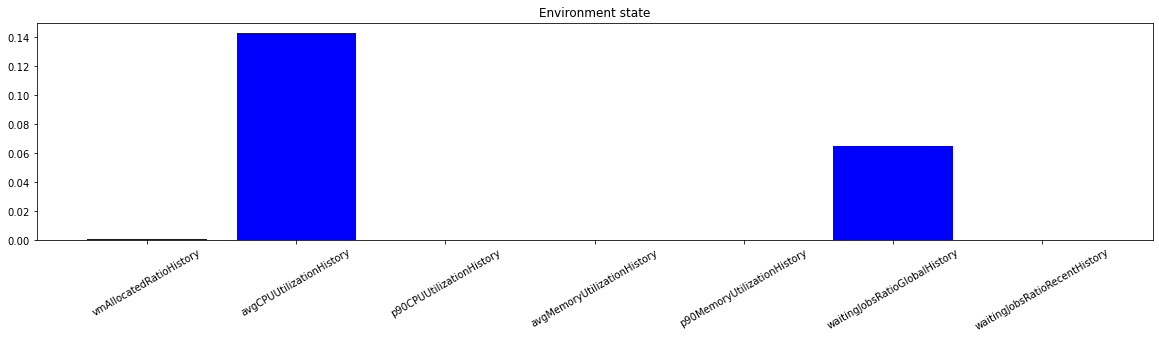

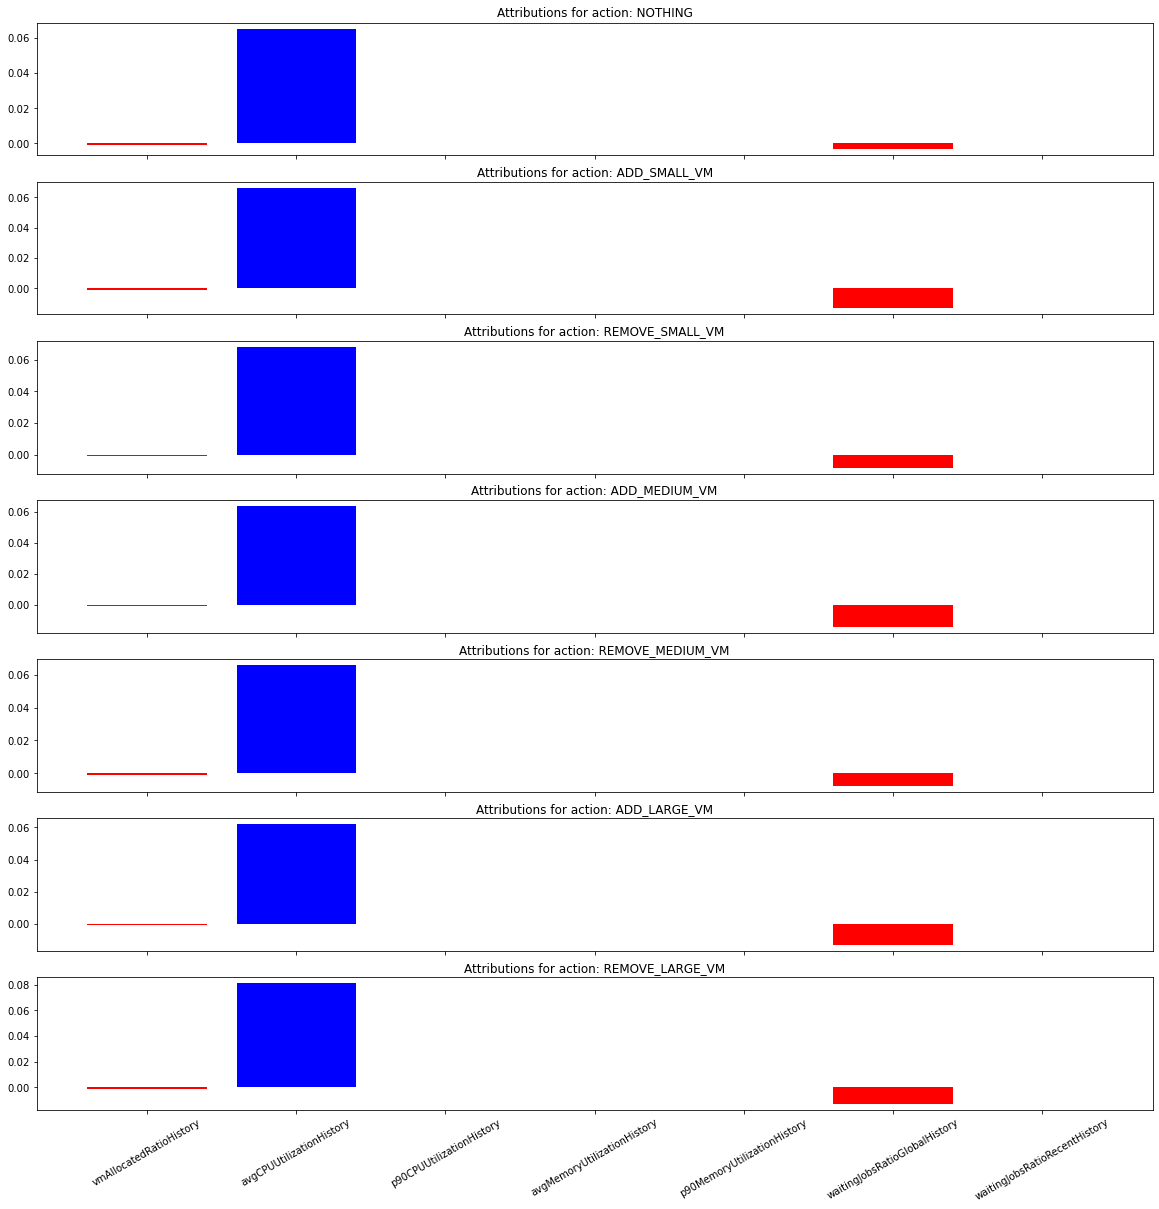

In [16]:
ig_attributor.explain_example(idx=0)

In [17]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [14]:
X_manual.shape

torch.Size([3, 1, 7])

In [18]:
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_manual,
                            predictions=predictions_manual)

torch.Size([4, 1, 7])


Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: 0.3579419255256653
ADD_SMALL_VM: 0.03698219358921051
REMOVE_SMALL_VM: 0.32457074522972107
ADD_MEDIUM_VM: 0.09110326319932938
REMOVE_MEDIUM_VM: 0.3060845732688904
ADD_LARGE_VM: 0.1196557879447937
REMOVE_LARGE_VM: 0.3890528380870819


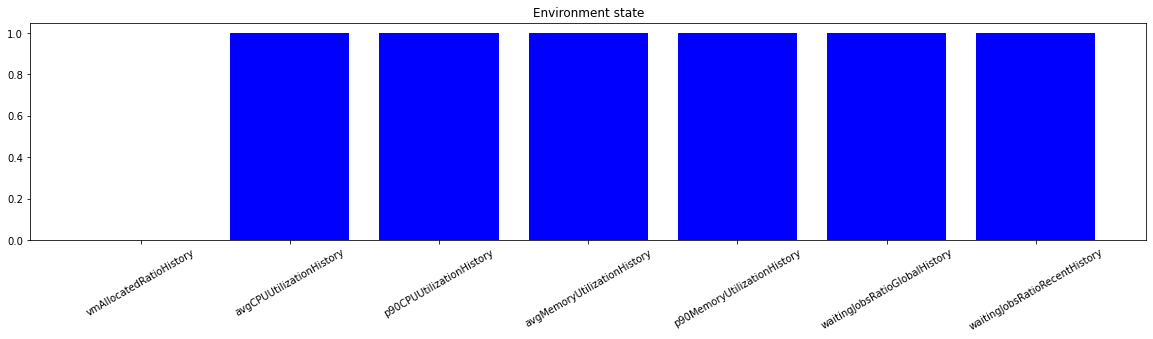

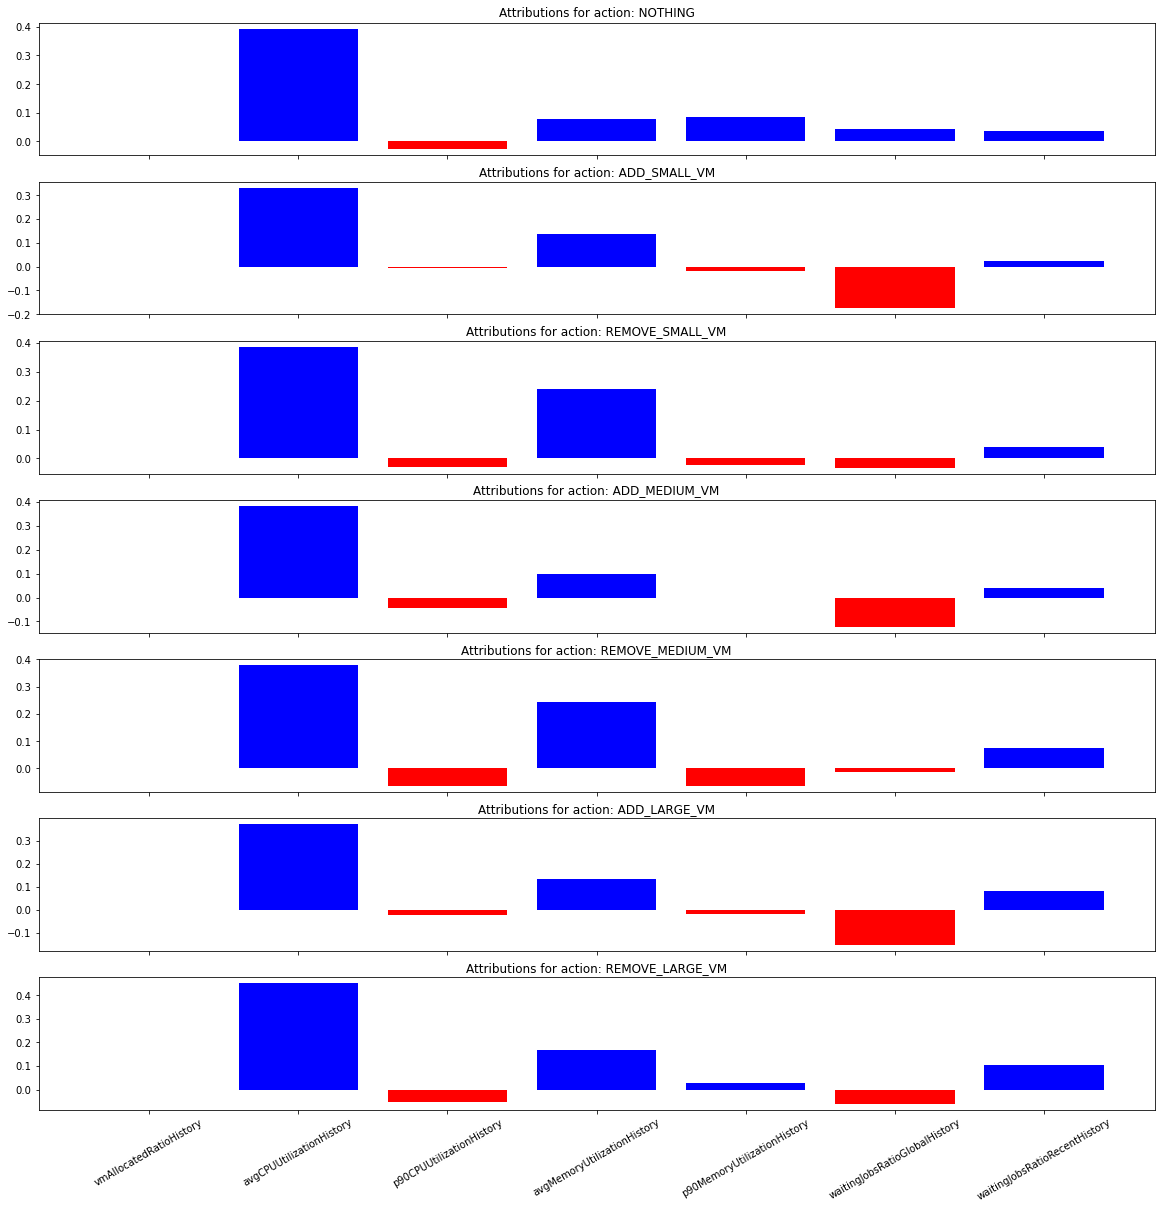

In [19]:
ig_attributor.explain_example(idx=0)